In [1]:
import os

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from IPython.display import display, display_html , HTML
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
train = pd.read_csv('train.csv')
train.name = 'train'
verify = pd.read_csv('val.csv')
verify.name = 'verify'
test = pd.read_csv('test.csv')
test.name = 'test'

datasets = [train,verify,test]
pd.set_option('display.max_row',max(train.shape[0],verify.shape[0],test.shape[0]))
pd.set_option('display.max_column',max(train.shape[1],verify.shape[1],test.shape[1]))
for df in datasets:
    print ("The dataset",df.name,"has",df.shape[0],"rows and",df.shape[1],"columns")
    
display(HTML('<h1>train</h1>'))
display(train.head())
display(HTML('<h1>verify</h1>'))
display(verify.head())
display(HTML('<h1>test</h1>'))
display(test.head())

The dataset train has 79786 rows and 54 columns
The dataset verify has 2836 rows and 55 columns
The dataset test has 2836 rows and 54 columns


,Num_Acc,jour,mois,an,hrmn,lum,dep,com,agg,int,atm,col,adr,lat,long,catr,voie,v1,v2,circ,nbv,vosp,prof,pr,pr1,plan,lartpc,larrout,surf,infra,situ,vma,id_vehicule,num_veh,place,catu,grav,sexe,an_nais,trajet,secu1,secu2,secu3,locp,actp,etatp,senc,catv,obs,obsm,choc,manv,motor,occutc
0,201900000001,30.0,11.0,2019.0,0.062500,4.0,93,93053,1.0,1.0,1.0,2.0,AUTOROUTE A3,488962100.0,24701200.0,1.0,3,0.0,NaN,3.0,10.0,0.0,1.0,6.0,900.0,2.0,NaN,NaN,1.0,2.0,1.0,70.0,138 306 524,B01,1,1,4,2,1993,5,1,0,-1,-1,-1,-1,2,7,0,2,5,23,1,NaN
1,201900000001,30.0,11.0,2019.0,0.062500,4.0,93,93053,1.0,1.0,1.0,2.0,AUTOROUTE A3,488962100.0,24701200.0,1.0,3,0.0,NaN,3.0,10.0,0.0,1.0,6.0,900.0,2.0,NaN,NaN,1.0,2.0,1.0,70.0,138 306 525,A01,1,1,1,1,1959,0,1,0,-1,-1,-1,-1,2,17,1,0,3,11,1,NaN
2,201900000003,28.0,11.0,2019.0,0.635417,1.0,92,92036,1.0,1.0,1.0,4.0,AUTOROUTE A86,489358718.0,23191744.0,1.0,86,0.0,NaN,3.0,8.0,0.0,1.0,10.0,500.0,3.0,NaN,NaN,1.0,0.0,1.0,90.0,138 306 522,C01,1,1,1,1,1966,1,1,0,-1,-1,0,-1,1,7,0,2,4,23,6,NaN
3,201900000003,28.0,11.0,2019.0,0.635417,1.0,92,92036,1.0,1.0,1.0,4.0,AUTOROUTE A86,489358718.0,23191744.0,1.0,86,0.0,NaN,3.0,8.0,0.0,1.0,10.0,500.0,3.0,NaN,NaN,1.0,0.0,1.0,90.0,138 306 520,A01,2,2,4,2,1930,9,1,0,-1,-1,0,-1,1,7,0,2,1,2,1,NaN
4,201900000003,28.0,11.0,2019.0,0.635417,1.0,92,92036,1.0,1.0,1.0,4.0,AUTOROUTE A86,489358718.0,23191744.0,1.0,86,0.0,NaN,3.0,8.0,0.0,1.0,10.0,500.0,3.0,NaN,NaN,1.0,0.0,1.0,90.0,138 306 521,B01,1,1,4,1,1995,9,1,0,-1,-1,0,-1,1,7,1,0,4,2,1,NaN


,sample_id,Num_Acc,jour,mois,an,hrmn,lum,dep,com,agg,int,atm,col,adr,lat,long,catr,voie,v1,v2,circ,nbv,vosp,prof,pr,pr1,plan,lartpc,larrout,surf,infra,situ,vma,id_vehicule,num_veh,place,catu,grav,sexe,an_nais,trajet,secu1,secu2,secu3,locp,actp,etatp,senc,catv,obs,obsm,choc,manv,motor,occutc
0,0,201900053412,17.0,9.0,2019.0,0.791667,1.0,94,94071,2.0,3.0,1.0,3.0,CITE VERTE (R DE LA),487715700.0,2.524980e+07,3.0,233,0.0,NaN,2.0,2.0,0.0,1.0,0.0,0.0,1.0,NaN,NaN,1.0,0.0,1.0,50.0,138 205 619,B01,4,2,4,1,2012,2,1,0,-1,-1,0,-1,2,7,0,2,8,15,1,NaN
1,1,201900006923,6.0,6.0,2019.0,0.409722,1.0,27,27467,2.0,1.0,1.0,1.0,Rue des Déportés,493534990.0,5.206990e+06,9.0,NaN,0.0,NaN,2.0,2.0,0.0,1.0,NaN,NaN,1.0,NaN,NaN,1.0,0.0,1.0,50.0,138 293 514,B01,10,3,4,1,2003,5,0,-1,-1,3,3,3,2,7,0,1,1,1,1,NaN
2,2,201900017142,14.0,9.0,2019.0,0.041667,3.0,988,98810,1.0,1.0,1.0,6.0,RT1,-207247790.0,1.644348e+09,2.0,1,NaN,NaN,2.0,2.0,0.0,1.0,343.0,500.0,2.0,NaN,NaN,1.0,0.0,3.0,110.0,138 274 367,A01,9,2,2,2,1977,5,0,-1,-1,0,0,-1,1,7,13,0,1,1,1,NaN
3,3,201900002567,14.0,2.0,2019.0,0.576389,1.0,24,24347,1.0,3.0,1.0,1.0,LA CROIX,447169650.0,7.994390e+06,3.0,660,NaN,NaN,2.0,2.0,0.0,2.0,35.0,NaN,2.0,NaN,NaN,1.0,0.0,1.0,80.0,138 301 734,A01,1,1,2,1,1947,5,2,-1,-1,0,0,-1,3,1,0,2,8,16,5,NaN
4,4,201900005013,13.0,6.0,2019.0,0.753472,1.0,47,47285,2.0,1.0,1.0,3.0,Cantet,444335250.0,1.122850e+06,3.0,289,NaN,NaN,2.0,2.0,0.0,3.0,8.0,450.0,3.0,NaN,NaN,1.0,0.0,1.0,50.0,138 297 051,A01,1,1,3,1,1997,5,2,-1,-1,0,0,-1,2,33,0,2,1,13,1,NaN


,sample_id,Num_Acc,jour,mois,an,hrmn,lum,dep,com,agg,int,atm,col,adr,lat,long,catr,voie,v1,v2,circ,nbv,vosp,prof,pr,pr1,plan,lartpc,larrout,surf,infra,situ,vma,id_vehicule,num_veh,place,catu,sexe,an_nais,trajet,secu1,secu2,secu3,locp,actp,etatp,senc,catv,obs,obsm,choc,manv,motor,occutc
0,0,201900038114,2.0,5.0,2019.0,0.552083,1.0,75,75120,2.0,2.0,2.0,3.0,BOULEVARD DAVOUT,488535250.0,24107910.0,4.0,BOULEVARD DAVOUT,0.0,NaN,1.0,2.0,0.0,1.0,0.0,0.0,1.0,NaN,NaN,2.0,0.0,1.0,50.0,138 234 382,B01,1,1,1,1964,1,1,0,-1,0,0,-1,0,10,0,2,1,1,1,NaN
1,1,201900041727,8.0,12.0,2019.0,0.944444,5.0,973,97307,2.0,2.0,3.0,6.0,Route Nationale 2,48860160.0,-523353290.0,2.0,2,NaN,NaN,2.0,2.0,0.0,1.0,0.0,560.0,1.0,NaN,NaN,2.0,0.0,1.0,50.0,138 227 759,A01,10,3,1,2003,5,0,-1,-1,3,5,1,2,7,0,1,2,0,1,NaN
2,2,201900043728,24.0,5.0,2019.0,0.041667,5.0,93,93053,2.0,9.0,1.0,5.0,PARC (RUE DU),488917000.0,24451000.0,3.0,40,0.0,NaN,3.0,6.0,0.0,1.0,0.0,0.0,1.0,NaN,NaN,1.0,0.0,1.0,50.0,138 223 955,B01,1,1,2,1977,9,1,0,-1,-1,-1,-1,3,7,0,2,0,0,1,NaN
3,3,201900036619,7.0,11.0,2019.0,0.465278,1.0,13,13001,1.0,1.0,2.0,2.0,A8 - PK 014+000 - SENS SUD NORD,435327390.0,53780360.0,1.0,8,NaN,NaN,3.0,3.0,0.0,1.0,14.0,0.0,1.0,NaN,NaN,2.0,0.0,1.0,130.0,138 237 262,B01,1,1,1,1973,4,1,-1,-1,0,0,-1,2,15,0,0,6,2,1,NaN
4,4,201900011711,18.0,3.0,2019.0,0.684028,1.0,76,76540,2.0,1.0,1.0,2.0,BRIAND. AVENUE ARISTIDE,494361400.0,11013200.0,3.0,6015,0.0,NaN,3.0,6.0,0.0,1.0,12.0,570.0,1.0,NaN,NaN,2.0,0.0,1.0,50.0,138 284 672,A01,2,2,2,1950,5,1,0,-1,-1,0,-1,1,7,0,2,4,2,1,NaN


In [4]:
#Visualizing datasets dtypes 1 by 1

train_dtypes = pd.DataFrame(np.transpose(np.array((train.columns,train.dtypes),dtype=object,)),columns=['features','dtype'])
verify_dtypes = pd.DataFrame(np.transpose(np.array((verify.columns,verify.dtypes),dtype=object,)),columns=['features','dtype'])
test_dtypes = pd.DataFrame(np.transpose(np.array((test.columns,test.dtypes),dtype=object,)),columns=['features','dtype'])


train_dtypes = train_dtypes.style.set_table_styles([{
    'selector': 'caption',
    'props': [
        ('color', '#585858'),
        ('font-size', '30px')
    ]
}])
verify_dtypes = verify_dtypes.style.set_table_styles([{
    'selector': 'caption',
    'props': [
        ('color', '#585858'),
        ('font-size', '30px')
    ]
}])
test_dtypes = test_dtypes.style.set_table_styles([{
    'selector': 'caption',
    'props': [
        ('color', '#585858'),
        ('font-size', '30px')
    ]
}])


train_dtypes_styler = train_dtypes.set_table_attributes("style='display:inline'").set_caption('train')
verify_dtypes_styler = verify_dtypes.set_table_attributes("style='display:inline'").set_caption('verify')
test_dtypes_styler = test_dtypes.set_table_attributes("style='display:inline'").set_caption('test')
space = "\xa0" * 50
display_html(train_dtypes_styler._repr_html_() + space + verify_dtypes_styler._repr_html_() + space + 
             test_dtypes_styler._repr_html_(), raw=True)

,features,dtype
0,Num_Acc,int64
1,jour,float64
2,mois,float64
3,an,float64
4,hrmn,float64
5,lum,float64
6,dep,object
7,com,object
8,agg,float64
9,int,float64


In [5]:
display(HTML('<h1><center>Missing values of the different tables (%)</center></h1>'))

a = pd.DataFrame(np.transpose(np.array((train.columns,round(train.isna().sum()/train.shape[0]*100,2)),dtype=object,)),columns=['features','missing_rate'])
b = pd.DataFrame(np.transpose(np.array((verify.columns,round(verify.isna().sum()/verify.shape[0]*100,2)),dtype=object,)),columns=['features','missing_rate'])
c = pd.DataFrame(np.transpose(np.array((test.columns,round(test.isna().sum()/test.shape[0]*100,2)),dtype=object,)),columns=['features','missing_rate'])

def highlight_greaterthan(x):
    if x.missing_rate > 80:
        return ['background-color: #FFCECE']*2
    if x.missing_rate > 40:
        return ['background-color: #FFE9CE']*2
    if x.missing_rate > 5:
        return ['background-color: #FFFECE']*2
    else:
        return ['background-color: #CEFFFC']*2
    
a = a.style.apply(highlight_greaterthan, axis=1).set_table_styles([{
    'selector': 'caption',
    'props': [
        ('color', '#585858'),
        ('font-size', '30px')
    ]
}])
b = b.style.apply(highlight_greaterthan, axis=1).set_table_styles([{
    'selector': 'caption',
    'props': [
        ('color', '#585858'),
        ('font-size', '30px')
    ]
}])
c = c.style.apply(highlight_greaterthan, axis=1).set_table_styles([{
    'selector': 'caption',
    'props': [
        ('color', '#585858'),
        ('font-size', '30px')
    ]
}])

a_styler = a.set_table_attributes("style='display:inline'").set_caption('train')
b_styler = b.set_table_attributes("style='display:inline'").set_caption('verify')
c_styler = c.set_table_attributes("style='display:inline'").set_caption('test')

space = "\xa0" * 50
display_html(a_styler._repr_html_() + space + b_styler._repr_html_() + space + c_styler._repr_html_(), raw=True)

display(HTML('<h3><i>The values highlighted are the ones above a certain threshold of missing values</i></h3>'))
display(HTML('<h3><i>We will get rid of those for the rest of the notebook</i></h3>'))

,features,missing_rate
0,Num_Acc,0.000000
1,jour,0.200000
2,mois,0.200000
3,an,0.200000
4,hrmn,0.200000
5,lum,0.200000
6,dep,0.200000
7,com,0.200000
8,agg,0.200000
9,int,0.200000




Number of values in " dep " {107}
['93' '92' '94' '87' '69' '38' '34' '13' '988' '976' '972' '2B' '91' '86'
 '83' '78' '77' '76' '72' '71' '67' '66' '60' '51' '50' '45' '37' '35'
 '33' '31' '29' '22' '19' '18' '17' '74' '2' '80' '59' '95' '63' '62'
 '974' '973' '2A' '84' '64' '9' '73' '43' '10' '36' '16' '7' '21' '40'
 '24' '4' '85' '27' '28' '52' '68' '42' '82' '49' '11' '30' '44' '61' '14'
 '56' '58' '54' '47' '41' nan '3' '75' '1' '57' '39' '23' '6' '5' '26'
 '48' '986' '971' '89' '25' '12' '88' '987' '65' '53' '46' '81' '8' '79'
 '32' '70' '90' '55' '978' '15' '977' '975']


------------------------------------------------


Number of values in " com " {10018}
['93053' '92036' '94069' ... '31228' '33022' '85099']


------------------------------------------------


Number of values in " adr " {27247}
['AUTOROUTE A3' 'AUTOROUTE A86' 'A4' ... '1 Rue des Bouvreuils'
 'Route de Castelnau' 'Route de Nieul-le-Dolent']


------------------------------------------------


Number of value

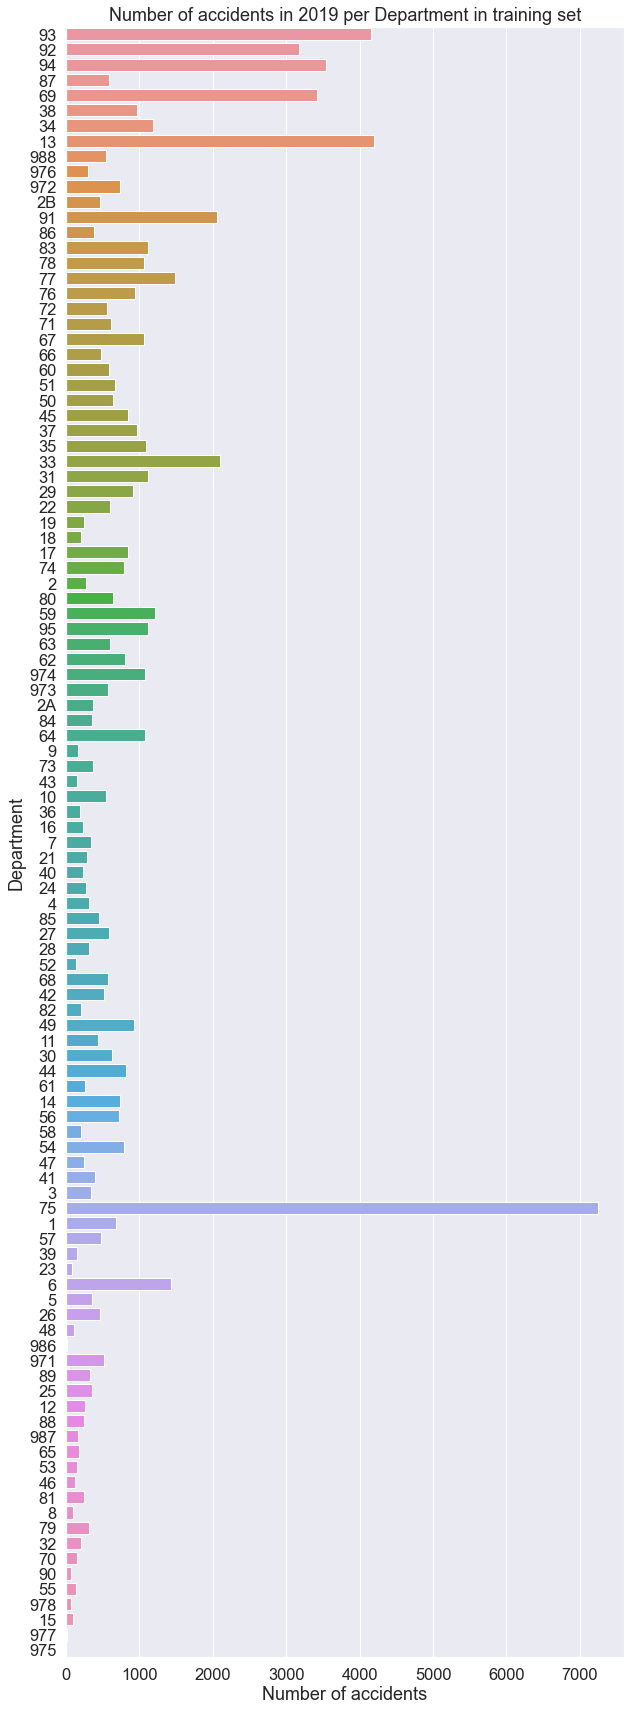

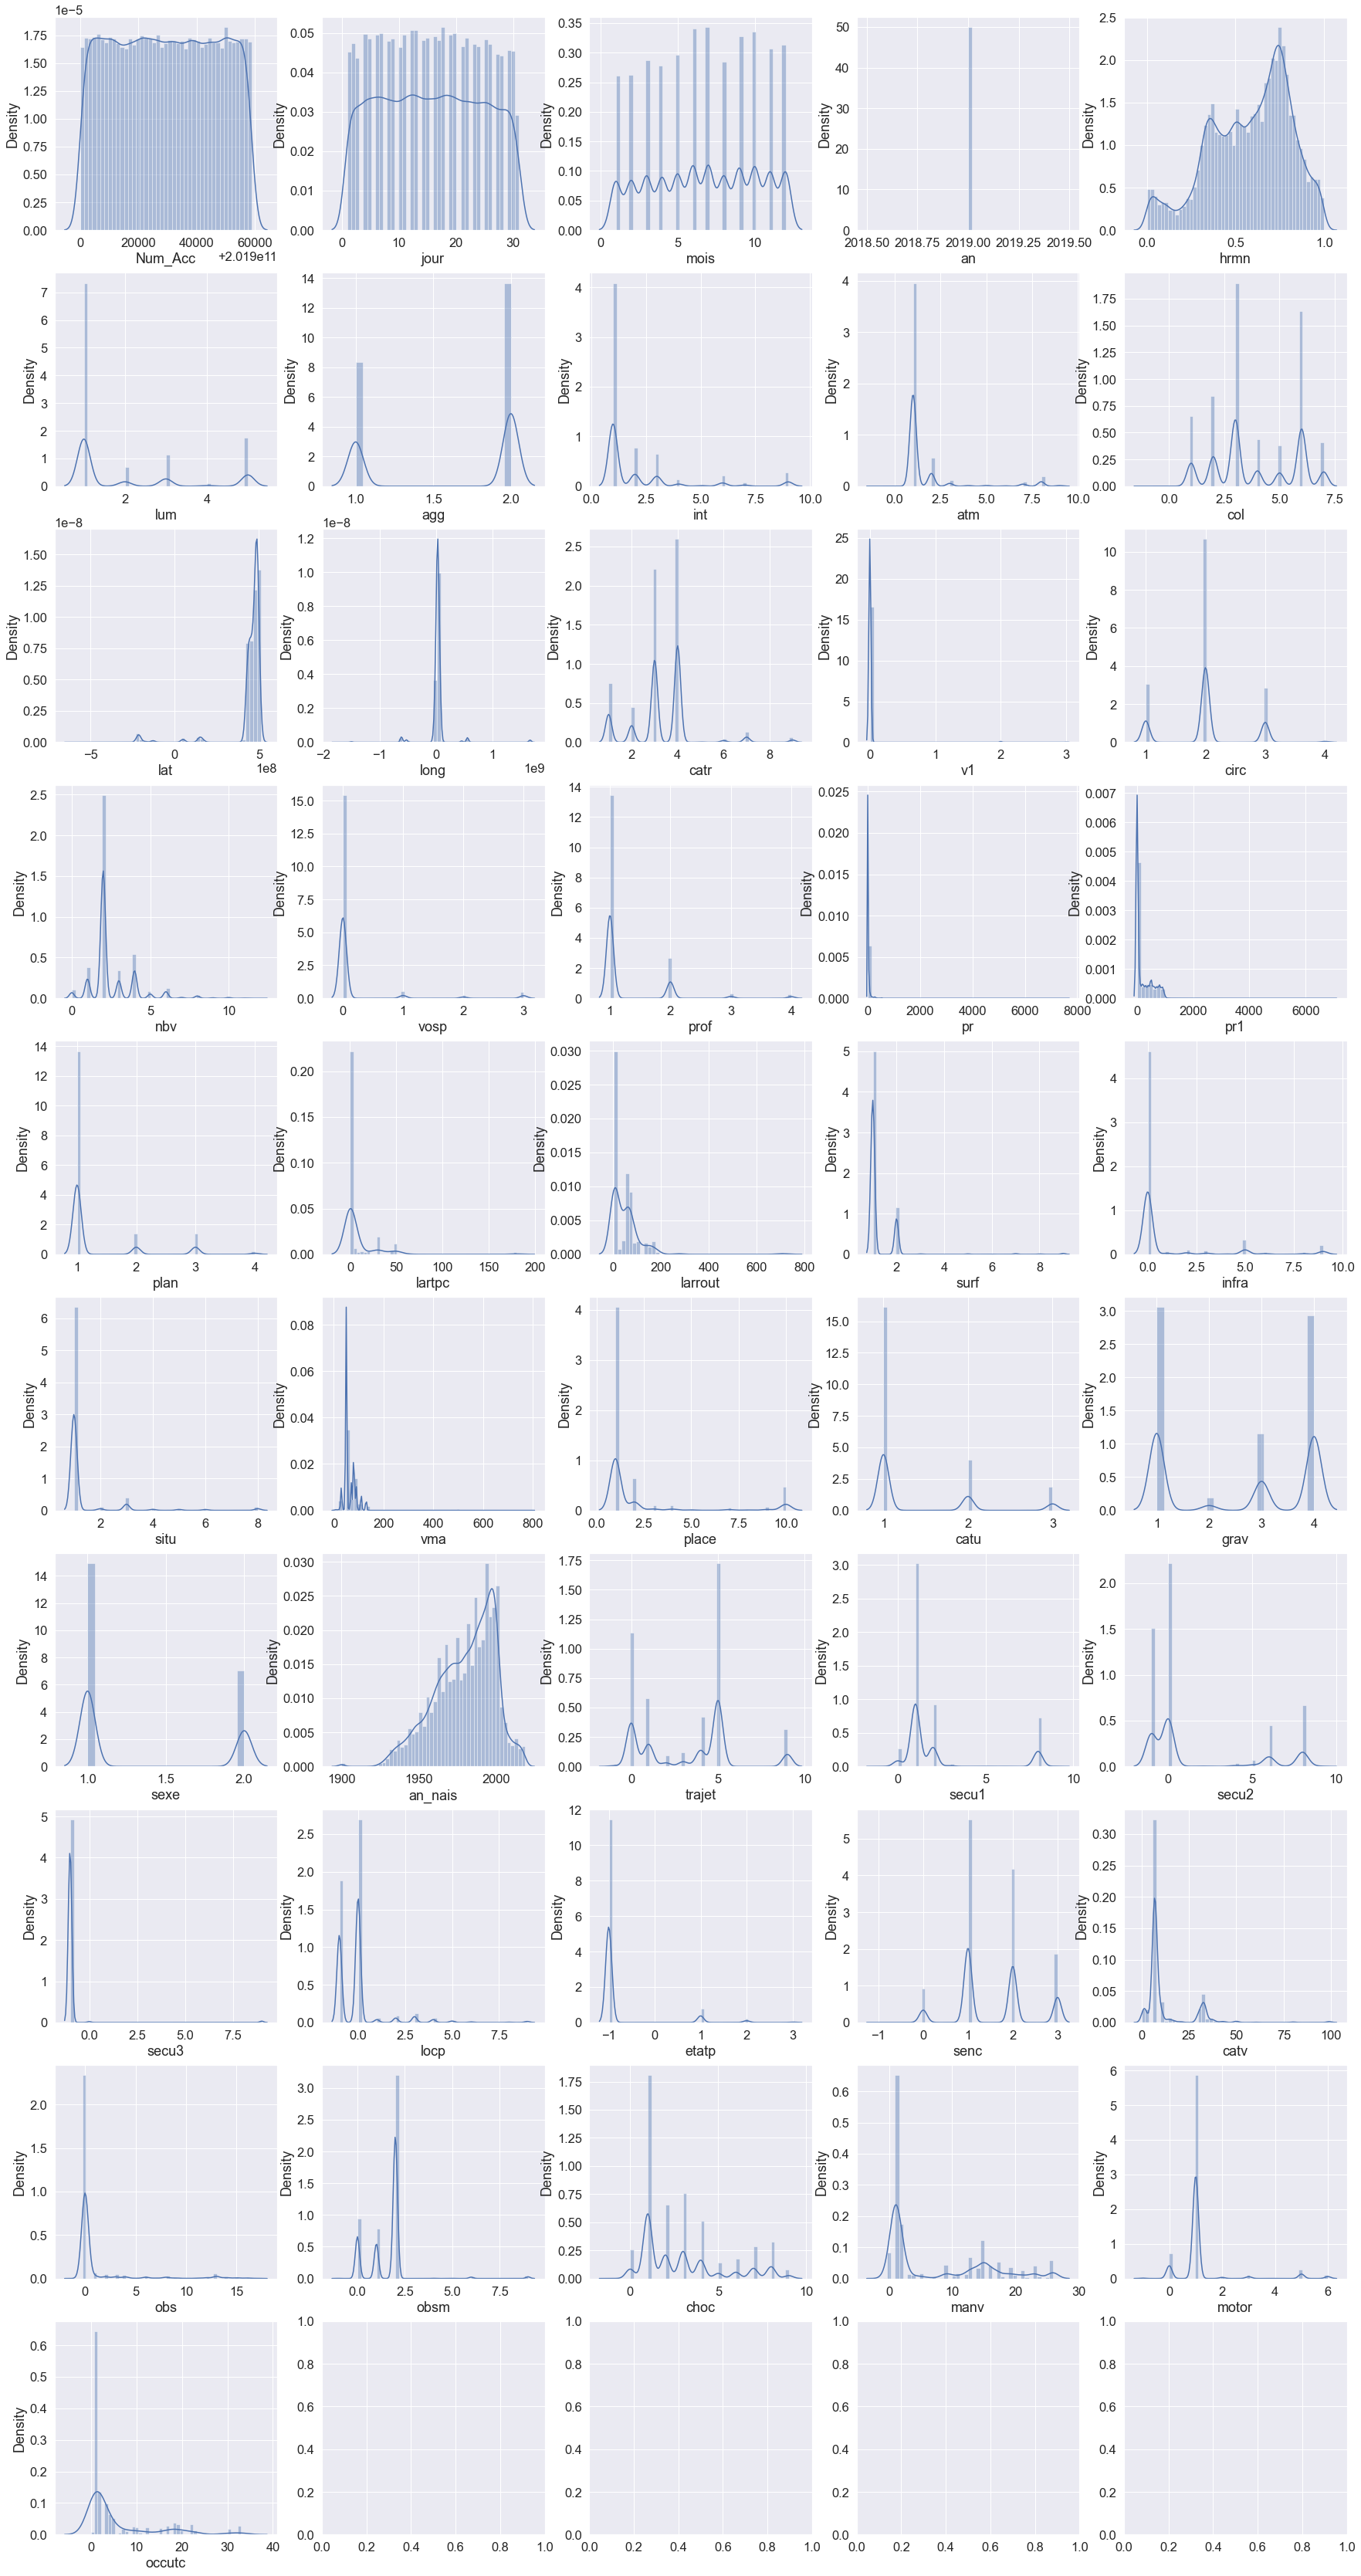

In [6]:
# Analyzing training data
for col in train.select_dtypes("object"):
    print('\n')
    print('Number of values in "',col,'"', {train[col].nunique()})
    print(train[col].unique())
    print('\n')
    print('------------------------------------------------')

sns.set(font_scale = 1.5)
plt.figure(figsize=(10, 30))
plt.title('Number of accidents in 2019 per Department in training set')
sns.countplot(y=train['dep'])
plt.xlabel("Number of accidents")
plt.ylabel("Department")
plt.show()

sns.set(font_scale = 1.5)
fig, ax = plt.subplots(10,5, figsize=(30, 60))
i=0
for col in train.select_dtypes(include=['float64','int64']):
    sns.distplot(train[col],label=col,ax=ax[i//5][i%5])
    i=i+1
fig.show()